In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
import sys

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
sys.path.insert(0, SOURCE_DIR)

In [3]:
import malaya_speech
import tensorflow as tf

In [4]:
featurizer = malaya_speech.featurization.STTFeaturizer()

In [5]:
x, sr = malaya_speech.load('../speech/example-speaker/husein-zolkepli.wav')
len(x), sr

(90090, 16000)

In [6]:
y = featurizer(x)
y.shape

(564, 80)

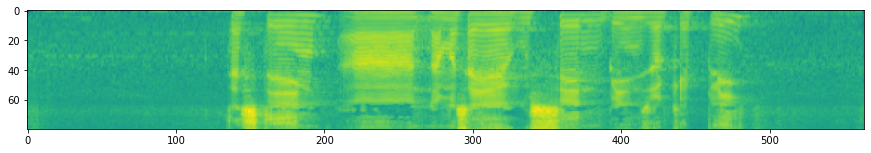

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.imshow(y.T)

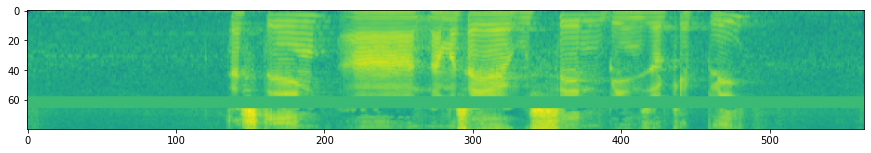

In [8]:
y_ = malaya_speech.augmentation.spectrogram.mask_frequency(y, n_freq_mask = 1, 
                                                           width_freq_mask = 16)

plt.figure(figsize = (15, 5))
plt.imshow(y_.T)

In [9]:
int(y.shape[0] * 0.1)

56

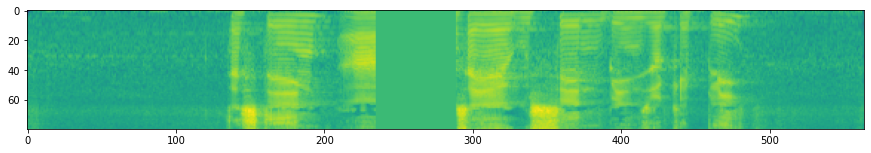

In [15]:
y_ = malaya_speech.augmentation.spectrogram.mask_time(y, n_time_mask = 1, width_time_mask = int(y.shape[0] * 0.1))

plt.figure(figsize = (15, 5))
plt.imshow(y_.T)

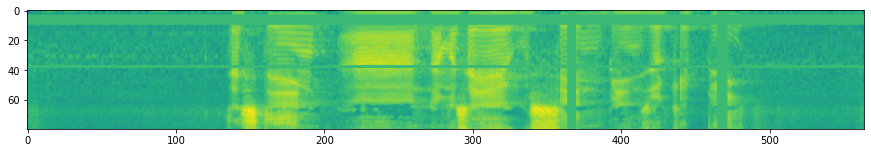

In [11]:
y_ = malaya_speech.augmentation.spectrogram.mask_frequency(y)
y_ = malaya_speech.augmentation.spectrogram.mask_time(y_)

plt.figure(figsize = (15, 5))
plt.imshow(y_.T)